# Models demo

This notebook demos several basic ML models using `sklearn`.

### Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8., 8.]   # set default figure size as (8,8)

In [3]:
def plot_data(X, y, ax=None, color=True, alpha=0.8):
    '''
    Custom function to plot data
    '''
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[y==0,0], X[y==0,1], s=40, marker='o', facecolor='none', 
                edgecolor='c' if color else 'k', alpha=alpha)
    ax.scatter(X[y==1,0], X[y==1,1], s=40, marker='x', c='k', alpha=alpha)
    ax.set(xlabel=r'$x_1$',
           ylabel=r'$x_2$')

def plot_decision_boundary(X, y, model, ax=None, fill=True):
    '''
    Custom function to plot the decision boundary of a classifier on 2D datat
    '''
    x_min, x_max = np.amin(X[:, 0]) - 1, np.amax(X[:, 0]) + 1
    y_min, y_max = np.amin(X[:, 1]) - 1, np.amax(X[:, 1]) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(xx, yy, Z,
                     cmap='RdBu', alpha=0.8)
        plot_data(X,y, ax=ax, color=False, alpha=0.4)
    else:
        ax.contour(xx, yy, Z, 
                    colors='k', linewidths=1, linestyles='dashed', 
                    levels=0.5, alpha=1.)
        plot_data(X,y, ax=ax, color=True, alpha=0.4)

## Generate some toy data

In [4]:
X, y = datasets.make_moons(n_samples=1000, noise=0.25)

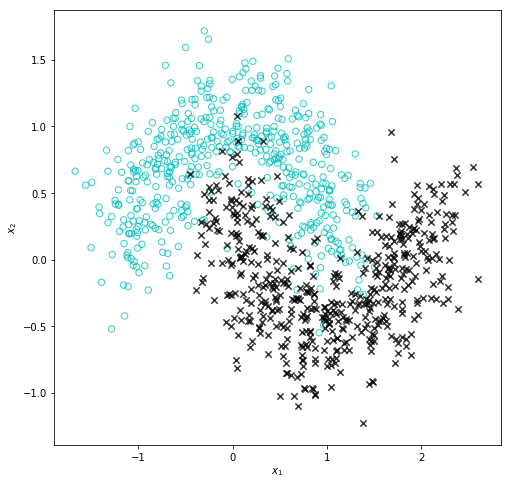

In [5]:
plot_data(X, y)

## Demo different classifiers

All `sklearn` models are represented as classes (this is called object-oriented programming), so your specific model is an *instance* of that class.  Each `sklearn` class has a `fit` and a `predict` method.

The classic example here is a class `Animal()` with methods `speak()` and `walk()`, and a child class `Dog()` which inherits those methods from its parent class.  You create an instance of this class for your dog, `fido = Dog()`.  You can then run `fido.speak()`, `fido.walk()`.  The beauty here is if we have another class, `Cat()` which is also a subclass of `Animal()`, we can follow the same pattern of `jinxy = Cat()` then `jinxy.speak()` etc.  And as you may imagine, although the structure is now shared, the result of `Dog().speak()` is "bark" whereas `Cat().speak()` is "meow".

In the modeling setting, we have, for example, a `Classifier()` superclass, with methods `fit()` and `predict()`.  We also have subclasses `LogisticRegression()`, `SVC()`, etc.  Training a model is now `mod = SVC().fit(X, y)`, and for a different model, we follow the same structure: `mod = LogisticRegression().fit(X, y)`.

In [8]:
clf = LogisticRegression(C=1.).fit(X, y)
predictions = clf.predict(X)
probability = clf.predict_proba(X)
print(predictions[:10])
print(probability[:10])

[0 0 0 1 1 0 1 1 1 1]
[[0.95251108 0.04748892]
 [0.97489718 0.02510282]
 [0.98807418 0.01192582]
 [0.01529799 0.98470201]
 [0.00872483 0.99127517]
 [0.95629474 0.04370526]
 [0.16268654 0.83731346]
 [0.01819975 0.98180025]
 [0.06091534 0.93908466]
 [0.09701723 0.90298277]]


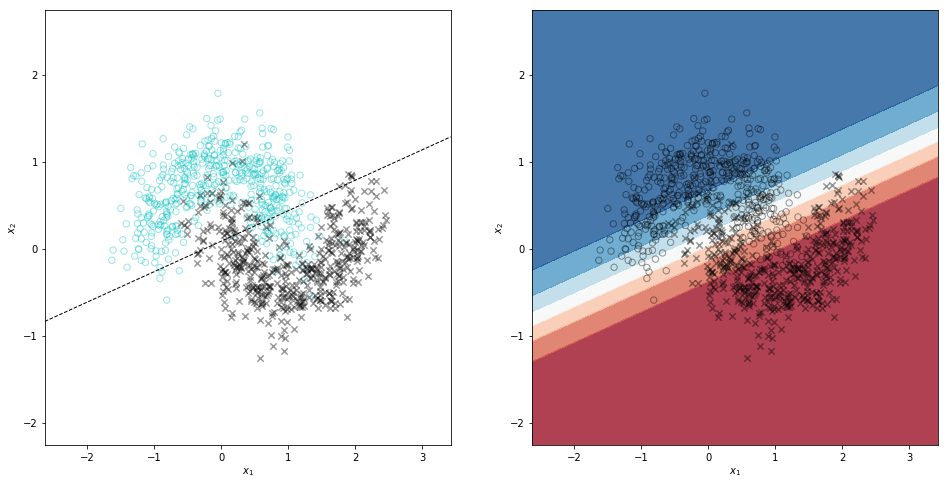

In [6]:
clf = LogisticRegression().fit(X,y)
# clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
# clf = RandomForestClassifier().fit(X, y)
# clf = SVC(C=0.1, kernel='rbf', probability=True).fit(X, y)
# clf = MLPClassifier(alpha=0.00001).fit(X, y)
# clf = MLPClassifier(hidden_layer_sizes=(1,), activation='identity').fit(X,y)

fig, axs = plt.subplots(1,2, figsize=(16,8))
plot_decision_boundary(X, y, clf, axs[0], fill=False)
plot_decision_boundary(X, y, clf, axs[1], fill=True)